In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
from pandas.plotting import lag_plot
import numpy as np
import sklearn as sk
from sklearn import preprocessing as pr
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from scipy.signal import correlate
from scipy.stats.mstats import spearmanr
from statsmodels.tsa.stattools import acf, adfuller
from statsmodels.graphics.tsaplots import plot_pacf
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import csv
from datetime import datetime
import seaborn as sns
color = sns.color_palette()
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import sys
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os

In [ ]:
from google.colab import files

uploaded = files.upload()

Saving coin_Bitcoin.csv to coin_Bitcoin.csv


# Q1.1

In [ ]:
coin_Bitcoin=pd.read_csv("/content/drive/MyDrive/Dataprep/coin_Bitcoin.csv")
coin_Bitcoin


SNo     Name Symbol  ...         Close        Volume     Marketcap
0        1  Bitcoin    BTC  ...    144.539993  0.000000e+00  1.603769e+09
1        2  Bitcoin    BTC  ...    139.000000  0.000000e+00  1.542813e+09
2        3  Bitcoin    BTC  ...    116.989998  0.000000e+00  1.298955e+09
3        4  Bitcoin    BTC  ...    105.209999  0.000000e+00  1.168517e+09
4        5  Bitcoin    BTC  ...     97.750000  0.000000e+00  1.085995e+09
...    ...      ...    ...  ...           ...           ...           ...
2986  2987  Bitcoin    BTC  ...  33897.048590  3.872897e+10  6.354508e+11
2987  2988  Bitcoin    BTC  ...  34668.548402  2.438396e+10  6.499397e+11
2988  2989  Bitcoin    BTC  ...  35287.779766  2.492431e+10  6.615748e+11
2989  2990  Bitcoin    BTC  ...  33746.002456  2.672155e+10  6.326962e+11
2990  2991  Bitcoin    BTC  ...  34235.193451  2.650126e+10  6.418992e+11

[2991 rows x 10 columns]

In [ ]:
date_time = pd.to_datetime(coin_Bitcoin.pop('Date'),format='%Y-%m-%d %H:%M:%S')


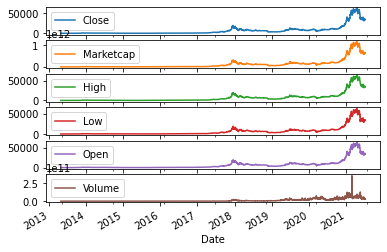

In [ ]:
# plotting the Closing price and Marketcap
plot_cols = ['Close','Marketcap','High',	'Low'	,'Open',	'Volume'	]
plot_features = coin_Bitcoin[plot_cols]
plot_features.index = date_time
_ = plot_features.plot(subplots=True)



In [ ]:
bitcoinn = pd.read_csv('/content/drive/My Drive/Dataprep/coin_Bitcoin.csv')


In [ ]:
def convert_data(data, name):
  data['Date'] = data['Date'].apply(lambda x: datetime.datetime.strptime(x, '%Y-%m-%d %H:%M:%S'))
  minimum_day = data['Date'].min()
  data['Day'] = data['Date'] - minimum_day
  data['Day'] = data['Day'].apply(lambda x: x.days)
  data[name] = data['Close']
  data.drop('Close', inplace=True, errors='ignore')
  return data

In [ ]:
import datetime

data = pd.DataFrame()
data = convert_data(bitcoinn, 'bitcoinn')
data = pd.merge(convert_data(coin_Cardano11, 'coin_Cardano11'), data, on=['Day'])
data = pd.merge(convert_data(coin_Iota11, 'coin_Iota11'), data, on=['Day'])
data = pd.merge(convert_data(coin_XRP11, 'coin_XRP11'), data, on=['Day'])
data = pd.merge(convert_data(coin_Ethereum11, 'coin_Ethereum11'), data, on=['Day'])
data = data[['Day', 'coin_Cardano11', 'coin_Iota11', 'bitcoinn', 'coin_XRP11', 'coin_Ethereum11']]

In [ ]:
data.head()


Day  coin_Cardano11  coin_Iota11    bitcoinn  coin_XRP11  coin_Ethereum11
0    0        0.025932     0.528916  144.539993    0.005613         0.753325
1    1        0.020816     0.363661  139.000000    0.004680         0.701897
2    2        0.021931     0.410757  116.989998    0.004417         0.708448
3    3        0.021489     0.419906  105.209999    0.004254         1.067860
4    4        0.018539     0.405862   97.750000    0.004291         1.217440

In [ ]:

import numpy as np
import matplotlib.pyplot as plt

x = data['Day']
data.plot(x='Day')
plt.show()

# Q1.2

In [ ]:
coin_Cardano11=pd.read_csv("/content/drive/MyDrive/Dataprep/coin_Cardano.csv")
coin_Iota11=pd.read_csv("/content/drive/MyDrive/Dataprep/coin_Iota.csv")
coin_XRP11=pd.read_csv("/content/drive/MyDrive/Dataprep/coin_XRP.csv")
coin_Ethereum11=pd.read_csv("/content/drive/MyDrive/Dataprep/coin_Ethereum.csv")




<Figure size 432x288 with 0 Axes>

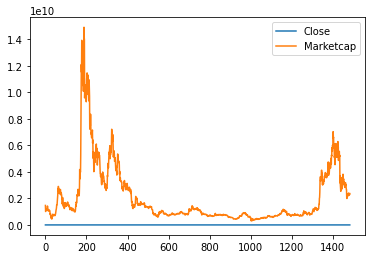

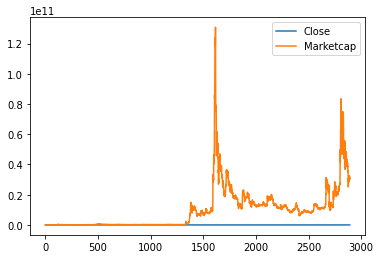

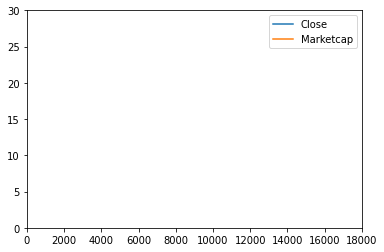

In [ ]:
fig = plt.figure()

for frame in [coin_Cardano, coin_Iota, coin_XRP, coin_Ethereum, coin_Bitcoin]:
    plot_cols = ['Close','Marketcap']
    plot_features = frame[plot_cols]
    _ = plot_features.plot(subplots=False)

plt.xlim(0,18000)
plt.ylim(0,30)
plt.show()

In [ ]:


crypto = {}
crypto['coin_Bitcoin'] = pd.read_csv("/content/drive/MyDrive/Dataprep/coin_Bitcoin.csv")

crypto['coin_Cardano'] = pd.read_csv("/content/drive/MyDrive/Dataprep/coin_Cardano.csv")
crypto['coin_Iota'] = pd.read_csv("/content/drive/MyDrive/Dataprep/coin_Iota.csv")
crypto['coin_XRP'] = pd.read_csv("/content/drive/MyDrive/Dataprep/coin_XRP.csv")
crypto['coin_Ethereum'] = pd.read_csv("/content/drive/MyDrive/Dataprep/coin_Ethereum.csv")


In [ ]:
# For this analysis I will only be looking at closing price to make things more manageable
for coin in crypto:
    for column in crypto[coin].columns:
        if column not in ['Date', 'Close']:
            crypto[coin] = crypto[coin].drop(column, 1)
    # Make date the datetime type and reindex
    crypto[coin]['Date'] = pd.to_datetime(crypto[coin]['Date'])
    crypto[coin] = crypto[coin].sort_values('Date')
    crypto[coin] = crypto[coin].set_index(crypto[coin]['Date'])
    crypto[coin] = crypto[coin].drop('Date', 1)

In [ ]:
for coin in crypto:
    print(coin, len(crypto[coin]))

coin_Bitcoin 2991
coin_Cardano 1374
coin_Iota 1484
coin_XRP 2893
coin_Ethereum 2160


In [ ]:
# Differencing
for coin in crypto:
    crypto[coin]['CloseDiff'] = crypto[coin]['Close'].diff().fillna(0)

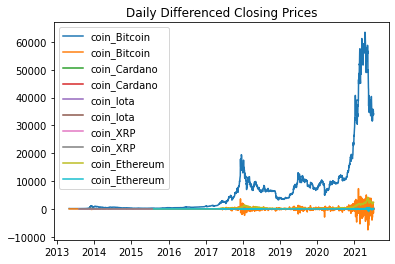

In [ ]:
for coin in crypto:
    plt.plot(crypto[coin], label=coin)
plt.legend(loc=2)
plt.title('Daily Differenced Closing Prices')
plt.show()

# 3. Display the auto correlation of each trace (1 point)

In [ ]:
# Import Packages
import warnings
warnings.filterwarnings('ignore')
import numpy as np 
import pandas as pd 
from pandas import DataFrame
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm
import statsmodels.tsa.api as smt
import statsmodels.formula.api as smf
from sklearn.metrics import mean_squared_error

%matplotlib inline

In [ ]:
data

Day  coin_Cardano11  ...  coin_XRP11  coin_Ethereum11
0        0        0.025932  ...    0.005613         0.753325
1        1        0.020816  ...    0.004680         0.701897
2        2        0.021931  ...    0.004417         0.708448
3        3        0.021489  ...    0.004254         1.067860
4        4        0.018539  ...    0.004291         1.217440
...    ...             ...  ...         ...              ...
1369  1369        1.394397  ...    0.093551       170.948168
1370  1370        1.406836  ...    0.101791       170.289302
1371  1371        1.458184  ...    0.141763       173.142739
1372  1372        1.404898  ...    0.198212       194.304342
1373  1373        1.418053  ...    0.160074       187.325323

[1374 rows x 6 columns]

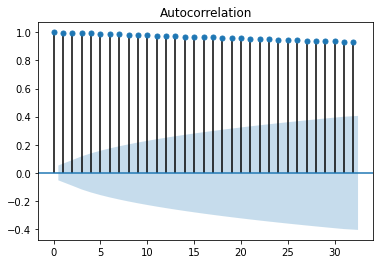

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf
data1=data['Day']
plot_acf(data1)
plt.show()

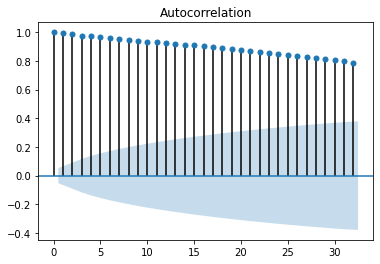

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf
data2=data['coin_Cardano11']
plot_acf(data2)
plt.show()

In [ ]:
tsm = coin_Cardano11['Close']
print (type(tsm))

<class 'pandas.core.series.Series'>


In [ ]:
tsmlog = np.log10(tsm)
tsmlog.dropna(inplace=True)

tsmlogdiff = tsmlog.diff(periods=1)
tsmlogdiff.dropna(inplace=True)
# Stationarity Check


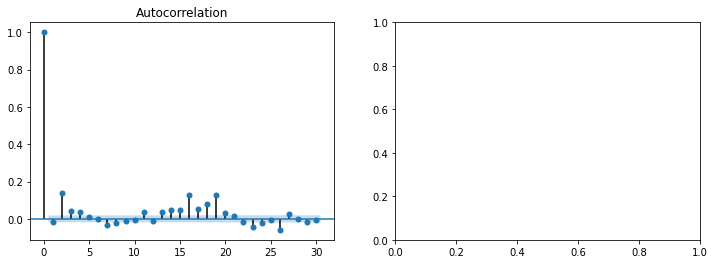

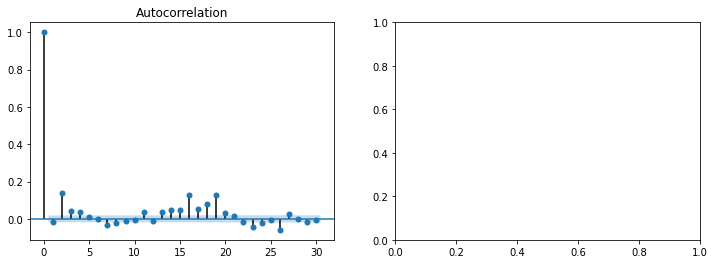

In [ ]:
# plot ACF & PACF graphs to visualize AR & MA components
fig, axes = plt.subplots(1, 2)
fig.set_figwidth(12)
fig.set_figheight(4)
smt.graphics.plot_acf(tsmlogdiff, lags=30, ax=axes[0], alpha=0.5)


In [ ]:
https://www.kaggle.com/rajshree07/time-series-analysis-arima

# 4. Use decision trees to predict the price of ’coin Cardano.csv’ by using the previous 5 data points, and then use the previous 10 data points to predict the current value. Discuss the quality of the results depending upon using 5 or 10 previous time points. (3 points)

# 5. Use decision trees to predict the price of ’coin Cardano.csv’ by using the previous 5 data points, of ’coin Bitcoin.csv’, and then also incorporate the previous 5 time points of ’coin XRP.csv’. Do the results improve when ’coin XRP.csv’time points previously seen are used? (3 points)

#6. Use XGBoost to predict the price of ’coin Cardano.csv’ by using the previous 5 data points, of ’coin Bitcoin.csv’, andthen also incorporate the previous 5 time points of ’coin XRP.csv’. Do the results improve when ’coin XRP.csv’ time points previously seen are used? (3 points)

# Question 2 (4 pnts)

In [4]:
! pip install geopandas


     |████████████████████████████████| 1.0 MB 25.6 MB/s 
     |████████████████████████████████| 15.4 MB 35 kB/s 
     |████████████████████████████████| 6.3 MB 62.8 MB/s 


# Q2.1

In [30]:
import matplotlib.pyplot as plt
import geopandas

In [53]:
from google.colab import files

uploaded = files.upload()

Saving geo_export_915d9e4b-1d3f-4151-8d88-221eddcd0d10.dbf to geo_export_915d9e4b-1d3f-4151-8d88-221eddcd0d10 (2).dbf


In [62]:
# Get the first state
tmpdf = states1.iloc[0]
# Which state
print(tmpdf.name)
# Get the centroid coordinates
tmpdf.geometry.centroid.coords[0]

0


AttributeError: ignored

In [63]:
states1.crs


In [67]:
states = geopandas.read_file('/content/drive/MyDrive/Dataprep/geo_export_915d9e4b-1d3f-4151-8d88-221eddcd0d10.dbf')
type(states)

DriverError: ignored

In [65]:
states.head()

cog_abbr  date_date_    time_date_  ... stratmap_i txdot_abbr geometry
0      113  1964-01-01  08:00:00.000  ...       None        004     None
1      113  1963-01-01  08:00:00.000  ...       None        004     None
2      113  1973-01-01  08:00:00.000  ...       None        004     None
3      113  1972-01-01  08:00:00.000  ...       None        004     None
4      113  1972-01-01  08:00:00.000  ...       None        004     None

[5 rows x 16 columns]

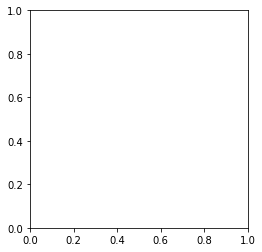

In [66]:
states1.plot()

In [37]:
feature='name'
states1[feature].value_counts()

Hutchinson    1
Hunt          1
Somervell     1
Nueces        1
Palo Pinto    1
             ..
Comal         1
Young         1
Brazos        1
Henderson     1
Menard        1
Name: name, Length: 254, dtype: int64

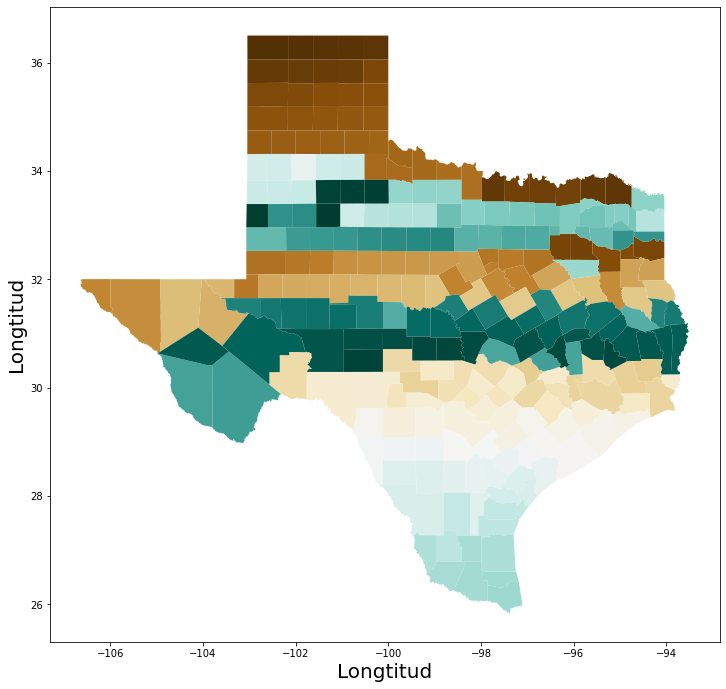

In [ ]:
states1.plot(cmap='BrBG', figsize=(12, 12))
plt.xlabel("Longtitud",font1)
plt.ylabel("Longtitud",font2)
font1={'size':20}
font2={'size':20}

# Q2.2

In [11]:
Houston = states1[states1['name'] == 'Houston']
Houston

cog_abbr  date_date_    time_date_  ... stratmap_i txdot_abbr geometry
222      107  1950-01-01  08:00:00.000  ...       None        011     None

[1 rows x 16 columns]

/usr/local/lib/python3.7/dist-packages/geopandas/plotting.py:684: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  UserWarning,


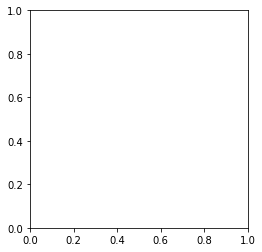

In [49]:


ax = states1[states1.FULLNAME == 'Houston'].plot(
    color='white', edgecolor='black')

# We can now plot our ``GeoDataFrame``.
texax.plot(ax=ax, color='red')

plt.show()

Text(89.76500000000001, 0.5, 'Longtitud')

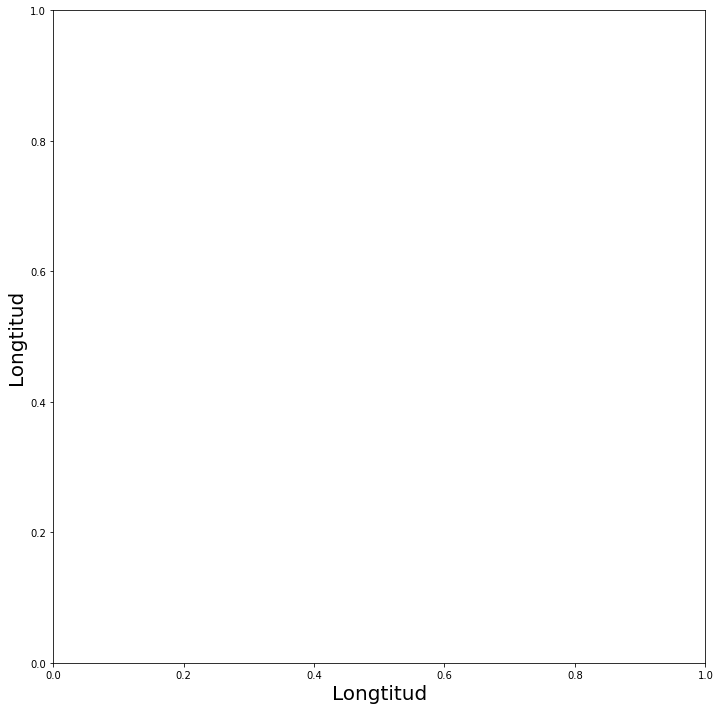

In [39]:
texax=states1.plot(cmap='BrBG', figsize=(12, 12))
font1={'size':20}
font2={'size':20}
plt.xlabel("Longtitud",font1)
plt.ylabel("Longtitud",font2)


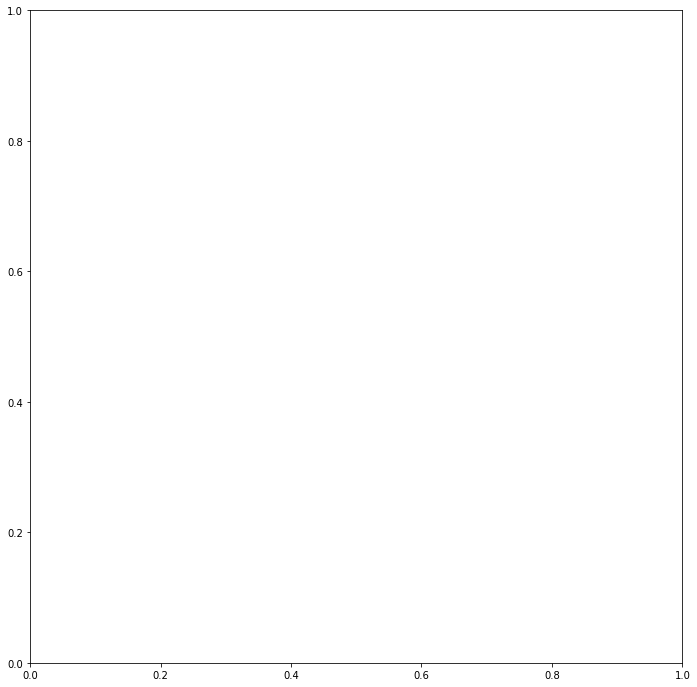

In [40]:
Houston.plot(cmap='Pastel2', figsize=(12, 12))

In [12]:
Austin = states1[states1['name'] == 'Austin']
Austin

cog_abbr  date_date_    time_date_  ... stratmap_i txdot_abbr geometry
97      110  1980-01-01  08:00:00.000  ...       None        013     None

[1 rows x 16 columns]

In [ ]:
Austin.plot(cmap='Pastel2', figsize=(12, 12))

# Question 3 (4 points)

In [5]:
from google.colab import files

uploaded = files.upload()

Saving mytext.txt to mytext.txt


In [6]:

with open('mytext.txt') as f:
    lines = f.read()

In [ ]:
lines1=lines
lines1

'The Project Gutenberg eBook of The Three Musketeers, by Alexandre Dumas, Père\n\nThis eBook is for the use of anyone anywhere in the United States and\nmost other parts of the world at no cost and with almost no restrictions\nwhatsoever. You may copy it, give it away or re-use it under the terms\nof the Project Gutenberg License included with this eBook or online at\nwww.gutenberg.org. If you are not located in the United States, you\nwill have to check the laws of the country where you are located before\nusing this eBook.\n\nTitle: The Three Musketeers\n\nAuthor: Alexandre Dumas, Père\n\nRelease Date: March 01, 1998 [eBook #1257]\n[Most recently updated: September 7, 2021]\n\nLanguage: English\n\n\nProduced by: John P. Roberts III, Roger Labbe, Scott David Gray, Sue Asscher, Anita Martin, David Muller and David Widger.\n\n*** START OF THE PROJECT GUTENBERG EBOOK THE THREE MUSKETEERS ***\n\n\n\n\n                           The Three Musketeers\n\n                                  _By

In [18]:
import nltk
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')

from nltk.corpus import stopwords
set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [15]:
import nltk

from nltk.tokenize import word_tokenize

In [19]:
all_stopwords = stopwords.words('english')
all_stopwords.remove('not')

text_tokens = word_tokenize(lines)
tokens_without_sw = [word for word in text_tokens if not word in all_stopwords]
print(tokens_without_sw)

['The', 'Project', 'Gutenberg', 'eBook', 'The', 'Three', 'Musketeers', ',', 'Alexandre', 'Dumas', ',', 'Père', 'This', 'eBook', 'use', 'anyone', 'anywhere', 'United', 'States', 'parts', 'world', 'cost', 'almost', 'restrictions', 'whatsoever', '.', 'You', 'may', 'copy', ',', 'give', 'away', 're-use', 'terms', 'Project', 'Gutenberg', 'License', 'included', 'eBook', 'online', 'www.gutenberg.org', '.', 'If', 'not', 'located', 'United', 'States', ',', 'check', 'laws', 'country', 'located', 'using', 'eBook', '.', 'Title', ':', 'The', 'Three', 'Musketeers', 'Author', ':', 'Alexandre', 'Dumas', ',', 'Père', 'Release', 'Date', ':', 'March', '01', ',', '1998', '[', 'eBook', '#', '1257', ']', '[', 'Most', 'recently', 'updated', ':', 'September', '7', ',', '2021', ']', 'Language', ':', 'English', 'Produced', ':', 'John', 'P.', 'Roberts', 'III', ',', 'Roger', 'Labbe', ',', 'Scott', 'David', 'Gray', ',', 'Sue', 'Asscher', ',', 'Anita', 'Martin', ',', 'David', 'Muller', 'David', 'Widger', '.', '***',

In [ ]:
len(tokens_without_sw) / len(text_tokens) * 100


62.42405091551061

In [ ]:
from collections import Counter
# we transform the text into a list of words 
# by splitting over the space character ' '
word_list = lines.split(' ')
# and count the words
word_counts = Counter(word_list)

In [ ]:
for w in word_counts.most_common(20):
    print(f"{w[0]}:  \t{w[1]} ")


the:  	10927 
to:  	5816 
of:  	5717 
and:  	4581 
a:  	4039 
I:  	2798 
in:  	2774 
that:  	2588 
his:  	2442 
you:  	2389 
was:  	2116 
he:  	2104 
with:  	1821 
said:  	1763 
is:  	1646 
had:  	1587 
not:  	1573 
as:  	1430 
at:  	1348 
for:  	1308 


# 3.1

In [17]:
token=nltk.word_tokenize(lines)
token

LookupError: ignored

In [ ]:
from nltk.probability import FreqDist

Freq = FreqDist(token)
print(Freq.most_common(20))


[(',', 21693), ('the', 12689), ('.', 8404), ('“', 7799), ('”', 7667), ('to', 6562), ('of', 6408), ('and', 5384), ('a', 4556), ('I', 3805), ('you', 3255), ('that', 3181), ('in', 3159), ('’', 3134), ('his', 2907), (';', 2830), ('he', 2666), ('was', 2506), ('with', 2088), ('?', 1961)]


# 3.3 Which are the 20 words most similar to the name ’Athos’ using word vectors? And plot those values

In [1]:
from google.colab import files

uploaded = files.upload()


Saving mytext.txt to mytext.txt


In [2]:
with open('mytext.txt') as f:
    lines = f.readlines()

In [3]:
print(lines[100:120])

['    56 CAPTIVITY: THE FIFTH DAY\n', '    57 MEANS FOR CLASSICAL TRAGEDY\n', '    58 ESCAPE\n', '    59 WHAT TOOK PLACE AT PORTSMOUTH AUGUST 23, 1628\n', '    60 IN FRANCE\n', '    61 THE CARMELITE CONVENT AT BÉTHUNE\n', '    62 TWO VARIETIES OF DEMONS\n', '    63 THE DROP OF WATER\n', '    64 THE MAN IN THE RED CLOAK\n', '    65 TRIAL\n', '    66 EXECUTION\n', '    67 CONCLUSION\n', '    EPILOGUE\n', '\n', '\n', '\n', '\n', 'AUTHOR’S PREFACE\n', '\n', '\n']


In [4]:
from gensim.models import Word2Vec
dataset = pd.read_table('mytext.txt',delimiter='\t', lineterminator='\n')

def row_to_sentences(dataframe):
    columns = dataframe.columns.values
    corpus = []
    for index,row in dataframe.iterrows():
        if index == 1000:
            break
        sentence = ''
        for column in columns:
            sentence += ' '+str(row[column])
        corpus.append([sentence])
    return corpus

corpus = row_to_sentences(dataset)
clean_corpus = [[sentence[0].lower()] for sentence in corpus ]


# model = Word2Vec()
# model.build_vocab(clean_corpus)
model = Word2Vec(clean_corpus, size=100, window=5,  workers=4)

NameError: ignored

In [87]:

sims = model.wv.most_similar('Athos', topn=10) 

KeyError: ignored

In [78]:
voc_vec = word2vec.Word2Vec(vocab, min_count=1)


NameError: ignored

In [77]:
ge_model=Word2Vec('mytext.txt')

RuntimeError: ignored

In [ ]:
! pip install myFunctions

ERROR: Could not find a version that satisfies the requirement myFunctions (from versions: none)
ERROR: No matching distribution found for myFunctions


In [6]:
from gensim.test.utils import common_texts
from gensim.models import Word2Vec
model1 = Word2Vec(sentences=lines, window=5, min_count=1, workers=4)
model1.save("word2vec.model")
model1 = Word2Vec.load("word2vec.model")

In [46]:
mode = Word2Vec(text_tokens, workers=4)

In [49]:
import os
class MySentences(object):
    def __init__(self, dirname):
        self.dirname = dirname
 
    def __iter__(self):
        for fname in os.listdir(self.dirname):
            for line in open(os.path.join(self.dirname, fname)):
                yield line.split()
 
sentences = MySentences('/some/directory') # a memory-friendly iterator
model = gensim.models.Word2Vec(sentences)

FileNotFoundError: ignored

In [43]:
mode.train([["hello", "world"]], total_examples=1, epochs=1)


(0, 2)

In [7]:
vector = model1.wv['Athos']  # get numpy vector of a word
sims = model1.wv.most_similar('Athos', topn=10) 

KeyError: ignored

In [50]:
import pandas as pd
import math
import string
import re
import statistics
# NLP Packages
from gensim.models.phrases import Phrases, Phraser
import gensim.downloader as api
from gensim.models import Word2Vec

In [51]:
import re
import string
from gensim.models.phrases import Phrases, Phraser

'''
Clean String
'''
def cleanString(s : str):

    s = s.lower()

    # remove emojis
    regrex_pattern = re.compile(pattern = "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags = re.UNICODE)
    s = regrex_pattern.sub(r'',s)

    # remove non-alphabet characters
    myPunc = '!"#%&$()*+-./:;,<=>?@[\\]^_`{|}~'
    s = s.translate(s.maketrans(myPunc, ' '*len(myPunc)))
    s = s.translate(s.maketrans(string.digits, ' '*len(string.digits)))

    # clean up extra white-space
    s = re.sub('\s+',' ',s)
    return s.strip()

'''
Find Bigrams
'''
def findBigrams(corpus : list, min_count : int):

    corpusPhrased = []
    # this actually finds the bigrams
    phrases = Phrases(corpus, min_count = min_count, delimiter='_')

    for sent in corpus:
        phrased = phrases[sent]
        corpusPhrased.append(phrased)

    return corpusPhrased

'''
Process Sentences
'''
def processSentences(sentences : list, minStringSize = 5, minTokenCount = 3, splitonPeriod = False, phraseMinCount = 25, bigrams=True, trigrams=True):

    # apply string cleaning
    sentences_clean = list(map(cleanString, sentences))

    # lets filter out any short strings, as they likely wont hold enough information.
    sentences_clean = list(filter(lambda x: len(x) > minStringSize, sentences_clean))

    # okay so now lets go ahead and tokenize our sentences into words.
    # were going to ignore any sentences with fewer than 3 words.

    sentences_tokenized = []

    for sentence in sentences_clean:

        # for some of the larger bodies of text we are first going to split on periods to get 'real' sentences.
        if splitonPeriod:
            sents_split = sentence.split('.')

            for sent in sents_split:
                tokens = sent.split(' ')
                # were only going to care about 3 or greater.
                if len(tokens) >= minTokenCount:

                    sentences_tokenized.append(tokens)

        # dont split on period.
        else:
            tokens = sentence.split(' ')
            if len(tokens) >= minTokenCount:
                sentences_tokenized.append(tokens)


    # Time to find Bigrams and Trigrams
    if bigrams:
        sentences_tokenized = findBigrams(sentences_tokenized, phraseMinCount)
    if trigrams:
        sentences_tokenized = findBigrams(sentences_tokenized, phraseMinCount)

    return sentences_tokenized

# Now lets go ahead and apply our string processing to our raw sentences.
sentences_clean = processSentences(lines, minStringSize = 5, minTokenCount = 3, splitonPeriod = True, phraseMinCount = 25, bigrams=True, trigrams=False)

In [54]:
# start with text8 as a base. 
model11 = Word2Vec(text_tokens, min_count=25, window =2, sg = 1)
text_tokens

['The',
 'Project',
 'Gutenberg',
 'eBook',
 'of',
 'The',
 'Three',
 'Musketeers',
 ',',
 'by',
 'Alexandre',
 'Dumas',
 ',',
 'Père',
 'This',
 'eBook',
 'is',
 'for',
 'the',
 'use',
 'of',
 'anyone',
 'anywhere',
 'in',
 'the',
 'United',
 'States',
 'and',
 'most',
 'other',
 'parts',
 'of',
 'the',
 'world',
 'at',
 'no',
 'cost',
 'and',
 'with',
 'almost',
 'no',
 'restrictions',
 'whatsoever',
 '.',
 'You',
 'may',
 'copy',
 'it',
 ',',
 'give',
 'it',
 'away',
 'or',
 're-use',
 'it',
 'under',
 'the',
 'terms',
 'of',
 'the',
 'Project',
 'Gutenberg',
 'License',
 'included',
 'with',
 'this',
 'eBook',
 'or',
 'online',
 'at',
 'www.gutenberg.org',
 '.',
 'If',
 'you',
 'are',
 'not',
 'located',
 'in',
 'the',
 'United',
 'States',
 ',',
 'you',
 'will',
 'have',
 'to',
 'check',
 'the',
 'laws',
 'of',
 'the',
 'country',
 'where',
 'you',
 'are',
 'located',
 'before',
 'using',
 'this',
 'eBook',
 '.',
 'Title',
 ':',
 'The',
 'Three',
 'Musketeers',
 'Author',
 ':',
 '

In [57]:
model1.wv.most_similar(positive=['a'])

[('o', 0.4495273530483246),
 ('z', 0.43795454502105713),
 ('i', 0.4046323597431183),
 ('m', 0.3976738750934601),
 ('g', 0.31023097038269043),
 ('d', 0.29216986894607544),
 ('`', 0.28665852546691895),
 ('e', 0.2805807292461395),
 ('p', 0.27901583909988403),
 ('v', 0.27711647748947144)]